# 星巴克毕业项目

### 简介

这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

清洗数据非常重要也非常需要技巧。

你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额

**注意：**如果你正在使用 Workspace，在读取文件前，你需要打开终端/命令行，运行命令 `conda update pandas` 。因为 Workspace 中的 pandas 版本不能正确读入 transcript.json 文件的内容，所以需要更新到 pandas 的最新版本。你可以单击 notebook 左上角橘黄色的 jupyter 图标来打开终端/命令行。  

下面两张图展示了如何打开终端/命令行以及如何安装更新。首先打开终端/命令行：
<img src="pic1.png"/>

然后运行上面的命令：
<img src="pic2.png"/>

最后回到这个 notebook（还是点击橘黄色的 jupyter 图标），再次运行下面的单元格就不会报错了。

# 导入数据

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 审阅数据

In [3]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
print(portfolio.head(),portfolio.info(),portfolio.shape)
print("*"*60)
print(profile.head(),profile.info(),profile.shape)
print("*"*60)
print(transcript.head(),transcript.info(),transcript.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
                       channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4

In [5]:
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [6]:
print(portfolio.describe(include='all'))

                            channels  difficulty   duration  \
count                             10   10.000000  10.000000   
unique                             4         NaN        NaN   
top     [web, email, mobile, social]         NaN        NaN   
freq                               4         NaN        NaN   
mean                             NaN    7.700000   6.500000   
std                              NaN    5.831905   2.321398   
min                              NaN    0.000000   3.000000   
25%                              NaN    5.000000   5.000000   
50%                              NaN    8.500000   7.000000   
75%                              NaN   10.000000   7.000000   
max                              NaN   20.000000  10.000000   

                                      id offer_type     reward  
count                                 10         10  10.000000  
unique                                10          3        NaN  
top     0b1e1539f2cc45b7b9fa7c272da2e1d7   disco

In [7]:
print(profile.describe(include='all'))

                 age  became_member_on gender  \
count   17000.000000      1.700000e+04  14825   
unique           NaN               NaN      3   
top              NaN               NaN      M   
freq             NaN               NaN   8484   
mean       62.531412      2.016703e+07    NaN   
std        26.738580      1.167750e+04    NaN   
min        18.000000      2.013073e+07    NaN   
25%        45.000000      2.016053e+07    NaN   
50%        58.000000      2.017080e+07    NaN   
75%        73.000000      2.017123e+07    NaN   
max       118.000000      2.018073e+07    NaN   

                                      id         income  
count                              17000   14825.000000  
unique                             17000            NaN  
top     b1c58c9a9749400092a00d2ab36f6d50            NaN  
freq                                   1            NaN  
mean                                 NaN   65404.991568  
std                                  NaN   21598.299410  
min  

In [8]:
print(transcript.describe(include='all'))

              event                            person           time  \
count        306534                            306534  306534.000000   
unique            4                             17000            NaN   
top     transaction  94de646f7b6041228ca7dec82adb97d2            NaN   
freq         138953                                51            NaN   
mean            NaN                               NaN     366.382940   
std             NaN                               NaN     200.326314   
min             NaN                               NaN       0.000000   
25%             NaN                               NaN     186.000000   
50%             NaN                               NaN     408.000000   
75%             NaN                               NaN     528.000000   
max             NaN                               NaN     714.000000   

                                                   value  
count                                             306534  
unique           

## 初步可视化

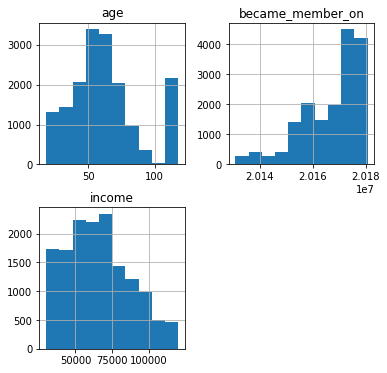

In [9]:
profile.hist(figsize=(6,6));

# 数据预处理

## 数据清洗

### 缺失值处理 

In [10]:
print(transcript.isna().sum())
print("*"*60)
print(profile.isna().sum())
print("*"*60)
print(portfolio.isna().sum())

event     0
person    0
time      0
value     0
dtype: int64
************************************************************
age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64
************************************************************
channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64


In [11]:
#profile gender  空值2175,income 2175
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [12]:
#NA值填充
profile.gender.fillna('NA',inplace=True)

In [13]:
#均值填充
profile.income.fillna(profile.income.mean(),inplace=True)

### 字符串处理

#### portfolio.channels,offertype,duration独热编码处理

In [14]:
#portfolio.channels独热编码处理
channel_set = set()
for channel in portfolio.channels:
    for i in channel:
        channel_set.add(i)
print(list(channel_set))
for i in channel_set:
    portfolio[i] = 0
    j = 0
    for channels in portfolio['channels']:
        if i in channels:
            portfolio.loc[[j],[i]]=1
        else:
            portfolio.loc[[j],[i]]  =0
        j = j+1
portfolio.drop(columns='channels',inplace=True)

['email', 'social', 'web', 'mobile']


In [15]:
### portfolio.offer_type :独热编码
portfolio = portfolio.join(pd.get_dummies(portfolio.offer_type))

In [16]:
#portfolio.drop(columns='offer_type',inplace=True)
portfolio

,difficulty,duration,id,offer_type,reward,email,social,web,mobile,bogo,discount,informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,0,1,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,0,1,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,1,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,1,0,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,0,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,0,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,0,1,0,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,0,1,1,0,1,0


In [17]:
portfolio = portfolio.join(pd.get_dummies(portfolio.duration,prefix='duration'))

#### transcript.event :独热编码

In [18]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [19]:
### transaction.event :独热编码
transcript = transcript.join(pd.get_dummies(transcript.event))
transcript.head()

,event,person,time,value,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0


#### transcript.value拆分处理

In [20]:
def value_split_key(x):
    return list(x.keys())

def value_split_amount(x):
    if  list(x.keys())[0] == 'amount':
        return list(x.values())[0]
    else: return 0

def value_split_offer(x):
    if  ((list(x.keys())[0] == 'offer id') or (list(x.keys())[0] == 'offer_id')):
        return list(x.values())[0]
    else: return 0
def value_split_reward(x):
    if len(x) >1 :
        if  ((list(x.keys())[1] == 'reward')):
            return list(x.values())[1]
        else:return 0
    else: return 0

In [21]:
transcript['key_id']=transcript['value'].apply(value_split_key)

In [22]:
transcript['amount']=transcript['value'].apply(value_split_amount)
transcript['offer_id']=transcript['value'].apply(value_split_offer)
transcript['reward']=transcript['value'].apply(value_split_reward)
transcript.head(),transcript.tail()

(            event                            person  time  \
 0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
 1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
 2  offer received  e2127556f4f64592b11af22de27a7932     0   
 3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
 4  offer received  68617ca6246f4fbc85e91a2a49552598     0   
 
                                               value  offer completed  \
 0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                0   
 1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                0   
 2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}                0   
 3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                0   
 4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                0   
 
    offer received  offer viewed  transaction      key_id  amount  \
 0               1             0            0  [offer id]     0.0   
 1               1             0            0  [

In [23]:
transcript.drop(columns=['value','key_id'],inplace=True)
transcript.head()

,event,person,time,offer completed,offer received,offer viewed,transaction,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,0.0,2906b810c7d4411798c6938adc9daaa5,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0


#### profile.gender 独热处理

In [24]:
#profile gender 独热编码
profile = profile.join(pd.get_dummies(profile.gender))

#### profile age分段处理

In [25]:
#年龄分段
profile['age_level'] = (profile['age']//10)

In [26]:
profile = profile.join(pd.get_dummies(profile.age_level,prefix='age_level'))

### 数据类型处理

#### profile.became_member_on转换为距今年份独热编码

In [27]:
#profile.became_member_on:转换为日期
profile.became_member_on = pd.to_datetime(profile.became_member_on,format='%Y%m%d')
#profile became_member_on 转换为至max时间的长度
endData=profile.became_member_on.max()
from datetime import datetime
profile['became_member_days']=(endData-profile['became_member_on']).dt.days
profile['became_member_days']=profile['became_member_days']//365

In [28]:
profile = profile.join(pd.get_dummies(profile.became_member_days,prefix='became_member_days'))
profile

,age,became_member_on,gender,id,income,F,M,NA,O,age_level,...,age_level_8,age_level_9,age_level_10,age_level_11,became_member_days,became_member_days_0,became_member_days_1,became_member_days_2,became_member_days_3,became_member_days_4
0,118,2017-02-12,NA,68be06ca386d4c31939f3a4f0e3dd783,65404.991568,0,0,1,0,11,...,0,0,0,1,1,0,1,0,0,0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.000000,1,0,0,0,5,...,0,0,0,0,1,0,1,0,0,0
2,118,2018-07-12,NA,38fe809add3b4fcf9315a9694bb96ff5,65404.991568,0,0,1,0,11,...,0,0,0,1,0,1,0,0,0,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.000000,1,0,0,0,7,...,0,0,0,0,1,0,1,0,0,0
4,118,2017-08-04,NA,a03223e636434f42ac4c3df47e8bac43,65404.991568,0,0,1,0,11,...,0,0,0,1,0,1,0,0,0,0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.000000,0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
6,118,2017-09-25,NA,8ec6ce2a7e7949b1bf142def7d0e0586,65404.991568,0,0,1,0,11,...,0,0,0,1,0,1,0,0,0,0
7,118,2017-10-02,NA,68617ca6246f4fbc85e91a2a49552598,65404.991568,0,0,1,0,11,...,0,0,0,1,0,1,0,0,0,0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.000000,0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
9,118,2016-11-22,NA,8974fc5686fe429db53ddde067b88302,65404.991568,0,0,1,0,11,...,0,0,0,1,1,0,1,0,0,0


#### profile.income 分段处理

In [29]:
profile['income_level']=pd.qcut(profile.income,q=5,labels=['income_low','income_low_mid','income_mid','income_high_mid','income_hig'])

In [30]:
profile = profile.join(pd.get_dummies(profile.income_level,prefix='income'))

In [31]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 33 columns):
age                       17000 non-null int64
became_member_on          17000 non-null datetime64[ns]
gender                    17000 non-null object
id                        17000 non-null object
income                    17000 non-null float64
F                         17000 non-null uint8
M                         17000 non-null uint8
NA                        17000 non-null uint8
O                         17000 non-null uint8
age_level                 17000 non-null int64
age_level_1               17000 non-null uint8
age_level_2               17000 non-null uint8
age_level_3               17000 non-null uint8
age_level_4               17000 non-null uint8
age_level_5               17000 non-null uint8
age_level_6               17000 non-null uint8
age_level_7               17000 non-null uint8
age_level_8               17000 non-null uint8
age_level_9               17000 

### 重复值处理

In [32]:
print(transcript.duplicated().sum())
print("*"*60)
print(profile.duplicated().sum())
print("*"*60)
print(portfolio.duplicated().sum())

397
************************************************************
0
************************************************************
0


In [33]:
#transaction_offer 重复值398
transcript[transcript.duplicated(keep='first')]

,event,person,time,offer completed,offer received,offer viewed,transaction,amount,offer_id,reward
66123,offer completed,3dde94fa581145cb9f206624f1a94d5a,168,1,0,0,0,0.0,2906b810c7d4411798c6938adc9daaa5,2
66783,offer completed,e9fb6ed2cecb4980ba98c86abc9c91e3,168,1,0,0,0,0.0,ae264e3637204a6fb9bb56bc8210ddfd,10
67614,offer completed,a7dc060f6fc94ca7bf71fbb188187dca,168,1,0,0,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
68562,offer completed,30478a4c1e884a63a822aa87b833ed7a,168,1,0,0,0,0.0,2298d6c36e964ae4a3e7e9706d1fb8c2,3
69218,offer completed,84fb57a7fe8045a8bf6236738ee73a0f,168,1,0,0,0,0.0,ae264e3637204a6fb9bb56bc8210ddfd,10
76757,offer completed,7cd890d4d691465aa25b683943a1c056,186,1,0,0,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5
79437,offer completed,1abeb816d9fa49b4b5b5ae51bc3d24c3,198,1,0,0,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2
80368,offer completed,8327c7a472974fbb9569532a55c07204,198,1,0,0,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2
84298,offer completed,64819ea1d8b64913a80d8ea0b9f071c5,210,1,0,0,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2
84778,offer completed,f5b1bf31e4484153a8d6ffbb312da4b7,210,1,0,0,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5


In [34]:
transcript.drop_duplicates( keep='first', inplace=True)

In [35]:
transcript.shape

(306137, 10)

### 异常值处理

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3108bc400>,
      dtype=object)

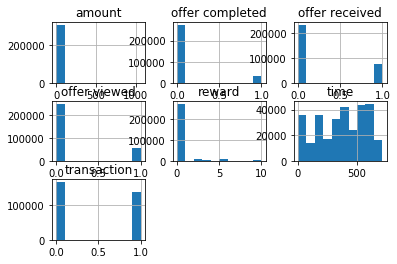

In [36]:
transcript.hist()

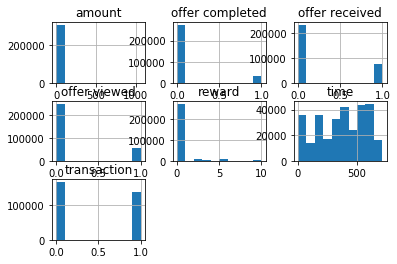

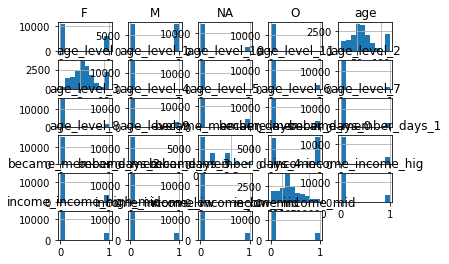

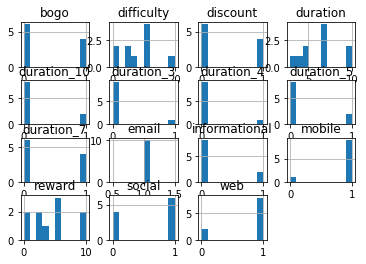

In [37]:
transcript.hist()
plt.show();
profile.hist()
plt.show();
portfolio.hist()
plt.show();

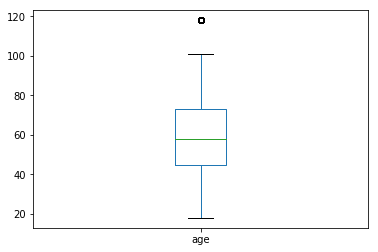

In [38]:
#profile age异常值 》100
profile.age.plot(kind='box')

In [39]:
#profile age >100 异常值用<100的mean取代  效果不好
# age_mean = profile[profile.age <100].age.mean()
# profile.age[profile.age>=100]=age_mean

In [40]:
#profile age >100 异常值抛弃
#profile = profile[profile.age<100]

## 数据集成

### 拆分交易记录及交易金额表

In [41]:
#transcript_offers 推送交易记录表
transcript_offers = transcript[~(transcript.transaction ==1)].drop('amount',axis=1)
#transcript_amount 推送交易金额表
transcript_amount = transcript[transcript.transaction ==1].drop('offer_id',axis=1)

In [42]:
transcript_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167184 entries, 0 to 306527
Data columns (total 9 columns):
event              167184 non-null object
person             167184 non-null object
time               167184 non-null int64
offer completed    167184 non-null uint8
offer received     167184 non-null uint8
offer viewed       167184 non-null uint8
transaction        167184 non-null uint8
offer_id           167184 non-null object
reward             167184 non-null int64
dtypes: int64(2), object(3), uint8(4)
memory usage: 8.3+ MB


In [43]:
transcript_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 9 columns):
event              138953 non-null object
person             138953 non-null object
time               138953 non-null int64
offer completed    138953 non-null uint8
offer received     138953 non-null uint8
offer viewed       138953 non-null uint8
transaction        138953 non-null uint8
amount             138953 non-null float64
reward             138953 non-null int64
dtypes: float64(1), int64(2), object(2), uint8(4)
memory usage: 6.9+ MB


### 推送记录表生成viewed_complete推送成功字段

In [48]:
# Group by the customers and offers to find each customer interaction with different offers
customer_interaction = transcript_offers.groupby(['person','offer_id'],as_index = False).sum()
customer_interaction

,person,offer_id,time,offer completed,offer received,offer viewed,transaction,reward
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1152,1,1,0,0,2
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,708,0,1,1,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,360,0,1,1,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1278,1,1,1,0,5
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1572,1,1,1,0,2
5,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,1590,0,2,2,0,0
6,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1416,1,1,1,0,5
7,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,606,1,1,1,0,3
8,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,6,0,1,1,0,0
9,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,690,0,1,1,0,0


In [56]:
customer_interaction[customer_interaction['offer received'] ==0]

,person,offer_id,time,offer completed,offer received,offer viewed,transaction,reward,diff_viewed_completed,complete_not_viewed,viewed_complete


In [49]:
#bogo、discount优惠转换成功条件；接到推送-打开查看推送-完成推送
customer_interaction['diff_viewed_completed'] = customer_interaction['offer viewed'].astype(int)-customer_interaction['offer completed'].astype(int)
customer_interaction['complete_not_viewed'] = np.where(customer_interaction['diff_viewed_completed']>=0, 0, customer_interaction['diff_viewed_completed'].abs())
customer_interaction['viewed_complete'] = customer_interaction['offer completed'].astype(int)-customer_interaction['complete_not_viewed'].astype(int)
customer_interaction['viewed_complete'] = np.where(customer_interaction['viewed_complete']>0,1,0)


customer_interaction

,person,offer_id,time,offer completed,offer received,offer viewed,transaction,reward,diff_viewed_completed,complete_not_viewed,viewed_complete
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1152,1,1,0,0,2,-1,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,708,0,1,1,0,0,1,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,360,0,1,1,0,0,1,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1278,1,1,1,0,5,0,0,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1572,1,1,1,0,2,0,0,1
5,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,1590,0,2,2,0,0,2,0,0
6,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1416,1,1,1,0,5,0,0,1
7,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,606,1,1,1,0,3,0,0,1
8,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,6,0,1,1,0,0,1,0,0
9,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,690,0,1,1,0,0,1,0,0


### customer_interaction关联 portfolio和profile 生成待分析列表

In [50]:
full_df = pd.merge(customer_interaction,portfolio,left_on='offer_id',right_on='id',how='left')
full_df = pd.merge(full_df,profile,left_on='person',right_on='id',how='left')

In [51]:
full_df.to_csv('full_df.csv')

# ****** restart

In [96]:
full_df= pd.read_csv('full_df.csv')
full_df.drop(columns='Unnamed: 0',inplace=True)

In [97]:
full_df['viewed_complete'].value_counts()

0    38828
1    24460
Name: viewed_complete, dtype: int64

In [98]:
#informational转化条件：接到推送-打开查看推送
full_df['viewed_complete'] = np.where((full_df['informational']==1) & (full_df['offer viewed']>0),1,full_df['viewed_complete'] )

In [99]:
full_df['viewed_complete'].value_counts()

1    33769
0    29519
Name: viewed_complete, dtype: int64

In [100]:
#无空值
res = full_df.isna().sum()
res[res>0]

gender    8066
dtype: int64

In [101]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 61 columns):
person                    63288 non-null object
offer_id                  63288 non-null object
time                      63288 non-null int64
offer completed           63288 non-null int64
offer received            63288 non-null int64
offer viewed              63288 non-null int64
transaction               63288 non-null int64
reward_x                  63288 non-null int64
diff_viewed_completed     63288 non-null int64
complete_not_viewed       63288 non-null int64
viewed_complete           63288 non-null int64
difficulty                63288 non-null int64
duration                  63288 non-null int64
id_x                      63288 non-null object
offer_type                63288 non-null object
reward_y                  63288 non-null int64
email                     63288 non-null int64
social                    63288 non-null int64
web                       63288 non-null 

In [102]:
full_df.drop(columns=['person','id_x','id_y','reward_y','transaction','reward_x'],inplace=True)

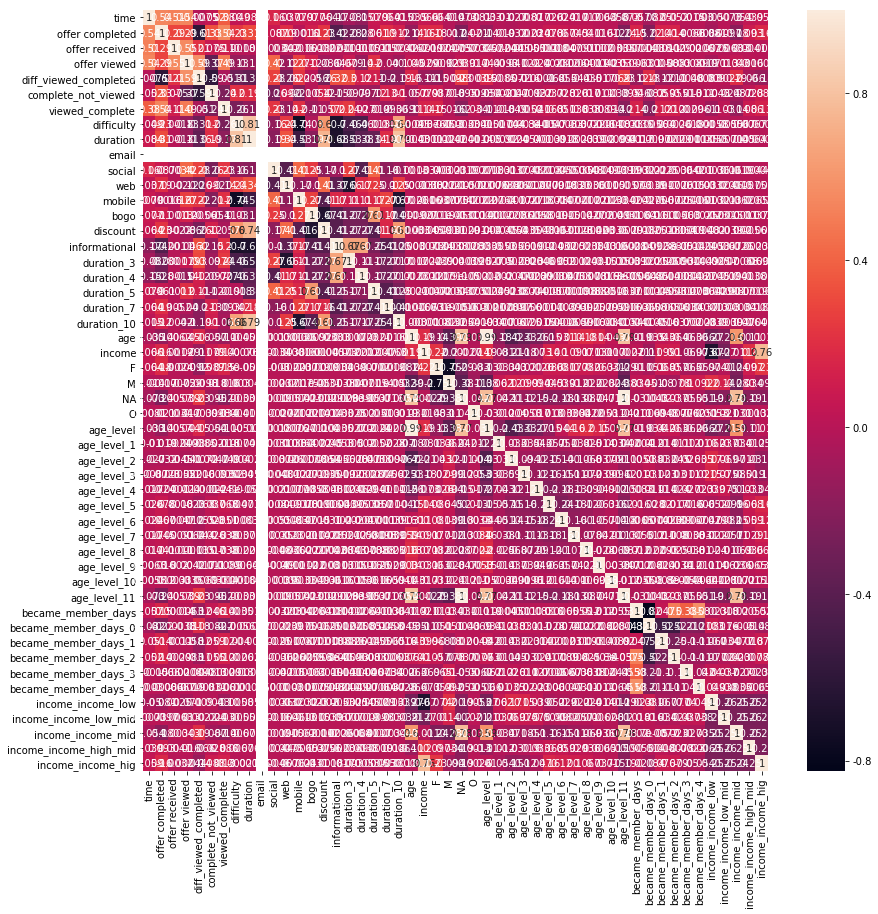

In [103]:
# 用热力图呈现 features_mean 字段之间的相关性
corr =full_df.corr()
plt.figure(figsize=(14,14))
# annot=True 显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

# 数据可视化

In [104]:
def effect_amount_list_plot(df,key_list,title):
    df_on = df.query('viewed_complete == 1')
    plt.ylabel("count of effect")
    (df_on[key_list].sum()).plot(kind='bar',title='{} for offer'.format(title))
    plt.show();
    plt.ylabel("percent of effect")
    (df_on[key_list].sum()/df[key_list].sum()).plot(kind='bar',title='{} for offer'.format(title))
    plt.show();
    series_res=pd.Series(index=[key_list])   

In [105]:
def effect_amount_col_plot(df,col):
    df_on =  df.query('viewed_complete == 1')
    res = df_on.groupby(col)[col].count()
    plt.ylabel('count of effect')
    res.plot(kind ='bar',title='{} for offer'.format(col))
    plt.show();
    res = df_on.groupby(col)[col].count()\
        /df.groupby(col)[col].count()
    plt.ylabel('percent of effect')
    res.plot(kind ='bar',title='{} for offer'.format(col))
    plt.show();

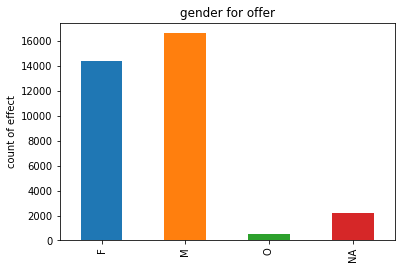

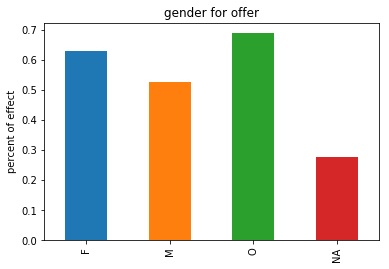

In [106]:
effect_amount_list_plot(full_df,['F','M','O','NA'],'gender')

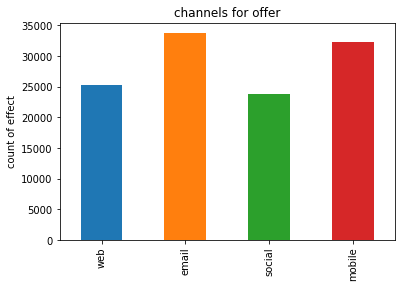

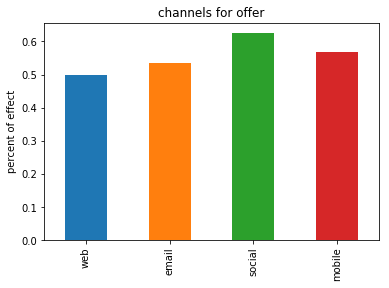

In [107]:
effect_amount_list_plot(full_df,['web','email','social','mobile'],'channels')

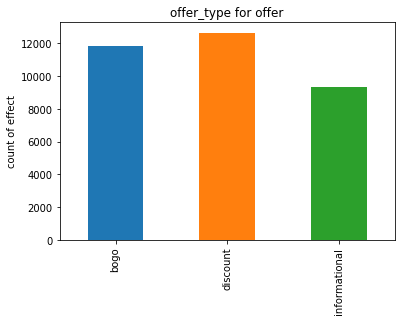

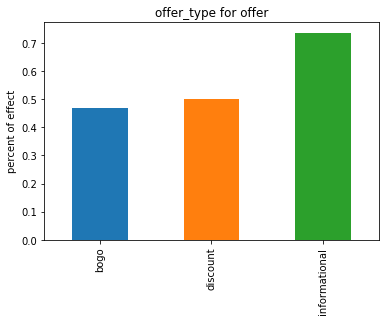

In [108]:
effect_amount_list_plot(full_df,['bogo','discount','informational'],'offer_type')

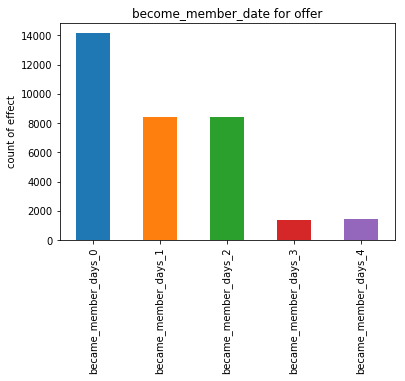

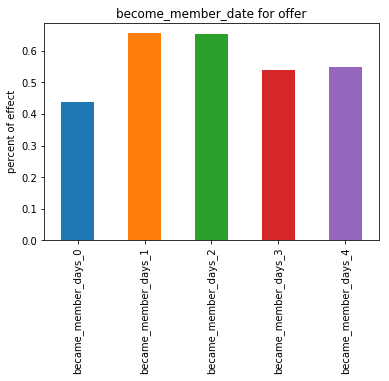

In [109]:
#become member date
effect_amount_list_plot(full_df,['became_member_days_0' ,'became_member_days_1',
    'became_member_days_2', 'became_member_days_3' ,'became_member_days_4'],'become_member_date')

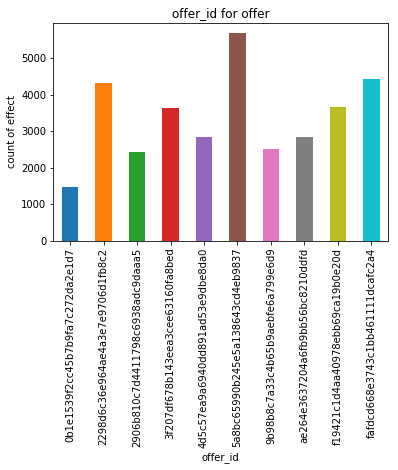

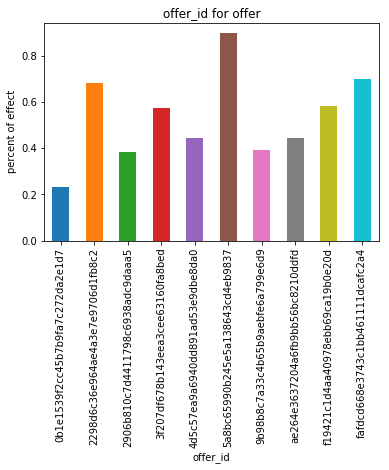

In [110]:
effect_amount_col_plot(full_df,'offer_id')

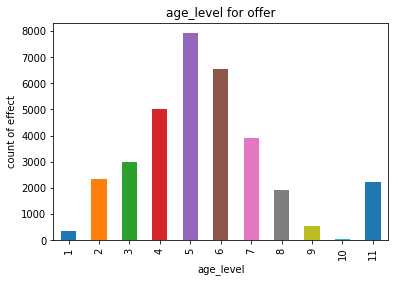

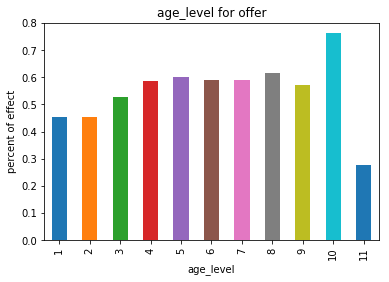

In [111]:
effect_amount_col_plot(full_df,'age_level')

# 建模

In [112]:
full_df_completed = full_df.query('viewed_complete == 1')

In [113]:
full_df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33769 entries, 1 to 63287
Data columns (total 55 columns):
offer_id                  33769 non-null object
time                      33769 non-null int64
offer completed           33769 non-null int64
offer received            33769 non-null int64
offer viewed              33769 non-null int64
diff_viewed_completed     33769 non-null int64
complete_not_viewed       33769 non-null int64
viewed_complete           33769 non-null int64
difficulty                33769 non-null int64
duration                  33769 non-null int64
offer_type                33769 non-null object
email                     33769 non-null int64
social                    33769 non-null int64
web                       33769 non-null int64
mobile                    33769 non-null int64
bogo                      33769 non-null int64
discount                  33769 non-null int64
informational             33769 non-null int64
duration_3                33769 non-null in

In [114]:
full_df_completed.head()

,offer_id,time,offer completed,offer received,offer viewed,diff_viewed_completed,complete_not_viewed,viewed_complete,difficulty,duration,...,became_member_days_1,became_member_days_2,became_member_days_3,became_member_days_4,income_level,income_income_low,income_income_low_mid,income_income_mid,income_income_high_mid,income_income_hig
1,3f207df678b143eea3cee63160fa8bed,708,0,1,1,1,0,1,0,4,...,1,0,0,0,income_high_mid,0,0,0,1,0
2,5a8bc65990b245e5a138643cd4eb9837,360,0,1,1,1,0,1,0,3,...,1,0,0,0,income_high_mid,0,0,0,1,0
3,f19421c1d4aa40978ebb69ca19b0e20d,1278,1,1,1,0,0,1,5,5,...,1,0,0,0,income_high_mid,0,0,0,1,0
4,fafdcd668e3743c1bb461111dcafc2a4,1572,1,1,1,0,0,1,10,10,...,1,0,0,0,income_high_mid,0,0,0,1,0
6,0b1e1539f2cc45b7b9fa7c272da2e1d7,1416,1,1,1,0,0,1,20,10,...,0,0,0,0,income_low_mid,0,1,0,0,0


In [115]:
full_df_completed[['bogo','discount']]

,bogo,discount
1,0,0
2,0,0
3,1,0
4,0,1
6,0,1
7,0,1
8,0,0
9,0,0
10,1,0
11,1,0


## 数据拆分

In [116]:
from sklearn.model_selection import train_test_split
# 抽取 20% 的数据作为测试集，其余作为训练集
train, test = train_test_split(full_df_completed, test_size = 0.2)
drop_col = ['offer_id','time','offer completed','offer received','offer viewed','diff_viewed_completed','complete_not_viewed',
            'viewed_complete','age','difficulty','age_level','became_member_on','income','gender','income_level',
            'bogo','discount','informational','duration','offer_type','became_member_days']
train_X = train.drop(columns=drop_col)
train_y_bogo=train['bogo']
train_y_discount=train['discount']
test_X= test.drop(columns=drop_col)
test_y_bogo =test['bogo']
test_y_discount =test['discount']
print(len(train_X),len(test_X))

27015 6754


In [117]:
train_X.shape,test_X.shape

((27015, 34), (6754, 34))

In [118]:
train_y_bogo.shape,test_y_bogo.shape,train_y_discount.shape,test_y_discount.shape

((27015,), (6754,), (27015,), (6754,))

In [120]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6754 entries, 57774 to 11637
Data columns (total 34 columns):
email                     6754 non-null int64
social                    6754 non-null int64
web                       6754 non-null int64
mobile                    6754 non-null int64
duration_3                6754 non-null int64
duration_4                6754 non-null int64
duration_5                6754 non-null int64
duration_7                6754 non-null int64
duration_10               6754 non-null int64
F                         6754 non-null int64
M                         6754 non-null int64
NA                        6754 non-null int64
O                         6754 non-null int64
age_level_1               6754 non-null int64
age_level_2               6754 non-null int64
age_level_3               6754 non-null int64
age_level_4               6754 non-null int64
age_level_5               6754 non-null int64
age_level_6               6754 non-null int64
age_level_7   

In [129]:
from  sklearn.tree import DecisionTreeClassifier
def simple_decisionTree(train_X,train_y,test_X,test_y,depth=None):
    clf=DecisionTreeClassifier(max_depth = depth)
    clf=clf.fit(train_X,train_y)
    score_tr = round(clf.score(train_X, train_y), 6)
    print(u'clf train score 准确率为 %.4lf' % score_tr)
    # 决策树预测
    pred_labels = clf.predict(test_X)
    # # 得到决策树准确率
    score_te = round(metrics.accuracy_score(pred_labels,test_y),6)
    print(u'clf test score 准确率为 %.4lf' % score_te)
    return score_tr,score_te,clf

In [122]:
#网格搜索
from sklearn.model_selection import GridSearchCV
def grid_searchCV(train_X,train_y):
    clf=DecisionTreeClassifier(random_state=25)
    param_grid1={'splitter':('best','random')
                ,'criterion':('entropy','gini')
                ,'max_depth':[*range(2,20,1)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
                }
    GS=GridSearchCV(clf,param_grid=param_grid1,cv=10, n_jobs=-1,verbose=1)
    GS.fit(train_X,train_y)
    print (GS.best_params_,GS.best_score_ )

In [177]:
#adaboostClassfier预测
from sklearn.ensemble import AdaBoostClassifier
def ada_classfier(train_X,train_y,test_X,test_y,n_estimators,learning_rate):
    clf=DecisionTreeClassifier(random_state=11
                              ,max_depth=6
                              ,criterion='entropy'
                              ,min_impurity_decrease=0
                           ,min_samples_leaf=1
                           ,splitter='best')
    ada = AdaBoostClassifier(base_estimator=clf,n_estimators=n_estimators,learning_rate=learning_rate)
    ada.fit(train_X,  train_y)
    score_tr = round(ada.score(train_X, train_y), 6)
    print(u'ada train 准确率为 %.4lf' % score_tr)
    pred_labels = ada.predict(test_X)
      #Calculate the accuracy and assign it to the variable acc on the test data.
    score_te = round(metrics.accuracy_score(pred_labels,test_y),6)
    print(u'ada test 准确率为 %.4lf' % score_te)
    return score_tr,score_te,ada

In [124]:
title_list = list(train.drop(columns=drop_col).columns)
#title_list

In [125]:
def plot_res (model,title_list):
    important_features = pd.Series(data=model.feature_importances_,index=title_list)
    print(important_features)
    important_features.sort_values(ascending=False).head(20).plot(kind='bar');

## bogo预测

### 简单决策树分类

In [130]:
simple_decisionTree(train_X,train_y_bogo,test_X,test_y_bogo)

clf train score 准确率为 0.9418
clf test score 准确率为 0.9240


(0.94181,
 0.924045,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

max_depth 1:
clf train score 准确率为 0.8397
clf test score 准确率为 0.8496
max_depth 2:
clf train score 准确率为 0.8397
clf test score 准确率为 0.8496
max_depth 3:
clf train score 准确率为 0.9249
clf test score 准确率为 0.9297
max_depth 4:
clf train score 准确率为 0.9285
clf test score 准确率为 0.9283
max_depth 5:
clf train score 准确率为 0.9302
clf test score 准确率为 0.9317
max_depth 6:
clf train score 准确率为 0.9303
clf test score 准确率为 0.9316
max_depth 7:
clf train score 准确率为 0.9307
clf test score 准确率为 0.9314
max_depth 8:
clf train score 准确率为 0.9314
clf test score 准确率为 0.9304
max_depth 9:
clf train score 准确率为 0.9325
clf test score 准确率为 0.9303
max_depth 10:
clf train score 准确率为 0.9337
clf test score 准确率为 0.9286


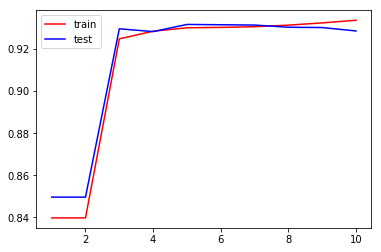

In [131]:
#探索在不同max_depth情况下模型拟合情况
tr=[]
te=[]
for i in range(10):
    print("max_depth {}:".format(i+1))
    res = simple_decisionTree(train_X,train_y_bogo,test_X,test_y_bogo,depth=i+1)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.legend()
plt.show()

In [132]:
#选择最佳max_depth
clf = simple_decisionTree(train_X,train_y_bogo,test_X,test_y_bogo,depth=7)[2]

clf train score 准确率为 0.9307
clf test score 准确率为 0.9314


### 网格搜索模型优化

In [135]:
grid_searchCV(train_X,train_y_bogo)

Fitting 10 folds for each of 14400 candidates, totalling 144000 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 9688 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 12688 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 16088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 24088 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 28688 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 33688 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 39088 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 44888 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 51088 tasks      | el

{'criterion': 'entropy', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'splitter': 'best'} 0.9295946696279844


In [139]:
clf=DecisionTreeClassifier(random_state=11
                              ,max_depth=6
                              ,criterion='entropy'
                              ,min_impurity_decrease=0
                           ,min_samples_leaf=1
                           ,splitter='best'
                              )
clf=clf.fit(train_X,train_y_bogo)
score_tr = round(clf.score(train_X, train_y_bogo), 6)
print(u'clf train 准确率为 %.4lf' % score_tr)
y_pred = clf.predict(test_X)
score_te = metrics.accuracy_score(test_y_bogo,y_pred)
print(u'clf test 准确率为 %.4lf' % score_te)

clf train 准确率为 0.9303
clf train 准确率为 0.9316


email                     0.000000
social                    0.110008
web                       0.158627
mobile                    0.000000
duration_3                0.000000
duration_4                0.000000
duration_5                0.446601
duration_7                0.284296
duration_10               0.000000
F                         0.000000
M                         0.000000
NA                        0.000000
O                         0.000000
age_level_1               0.000000
age_level_2               0.000000
age_level_3               0.000000
age_level_4               0.000000
age_level_5               0.000000
age_level_6               0.000223
age_level_7               0.000000
age_level_8               0.000000
age_level_9               0.000000
age_level_10              0.000244
age_level_11              0.000000
became_member_days_0      0.000000
became_member_days_1      0.000000
became_member_days_2      0.000000
became_member_days_3      0.000000
became_member_days_4

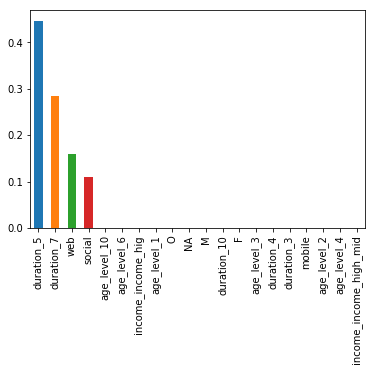

In [140]:
plot_res(clf,title_list)

### ada

n_estimators:2
ada train 准确率为 0.9333
ada test 准确率为 0.9303
n_estimators:3
ada train 准确率为 0.9361
ada test 准确率为 0.9289
n_estimators:4
ada train 准确率为 0.9370
ada test 准确率为 0.9297
n_estimators:5
ada train 准确率为 0.9381
ada test 准确率为 0.9273
n_estimators:6
ada train 准确率为 0.9386
ada test 准确率为 0.9282
n_estimators:7
ada train 准确率为 0.9391
ada test 准确率为 0.9279
n_estimators:8
ada train 准确率为 0.9394
ada test 准确率为 0.9277
n_estimators:9
ada train 准确率为 0.9400
ada test 准确率为 0.9257
n_estimators:10
ada train 准确率为 0.9405
ada test 准确率为 0.9258
n_estimators:11
ada train 准确率为 0.9413
ada test 准确率为 0.9245
n_estimators:12
ada train 准确率为 0.9413
ada test 准确率为 0.9248
n_estimators:13
ada train 准确率为 0.9413
ada test 准确率为 0.9245
n_estimators:14
ada train 准确率为 0.9415
ada test 准确率为 0.9242
n_estimators:15
ada train 准确率为 0.9417
ada test 准确率为 0.9246
n_estimators:16
ada train 准确率为 0.9417
ada test 准确率为 0.9240
n_estimators:17
ada train 准确率为 0.9417
ada test 准确率为 0.9240
n_estimators:18
ada train 准确率为 0.9418
ada test 准确率为 0.9243
n_est

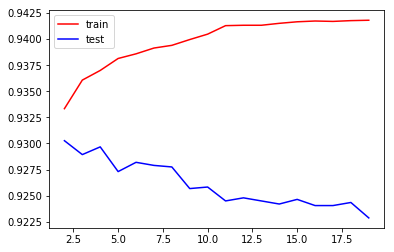

In [180]:
#探索在不同n_estimators情况下模型拟合情况
tr=[]
te=[]
range_list = range(2,20,1)
for i in range_list:
    print("n_estimators:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,i,1)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
#探索在不同learning_rate情况下模型拟合情况
tr=[]
te=[]
range_list =[0.01,0.05,0.1,0.25,0.5,0.8,1,1.5,2]
for i in range_list :
    print("learning_rate:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,10,i)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
#plt.xticks(range(1,11))
plt.legend()
plt.show()

In [145]:
res=ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,4000,1.5)

ada train 准确率为 0.9418
ada test 准确率为 0.92493300000000000515854026161832734942436


/home/jsyc/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:508: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


email                     0.000000e+00
social                             NaN
web                                NaN
mobile                    1.046599e-07
duration_3                         NaN
duration_4                         NaN
duration_5                         NaN
duration_7                         NaN
duration_10               1.565409e-14
F                                  NaN
M                                  NaN
NA                        3.554647e-03
O                        -2.431347e-02
age_level_1              -9.845388e-02
age_level_2                        NaN
age_level_3                        NaN
age_level_4                        NaN
age_level_5                        NaN
age_level_6                        NaN
age_level_7                        NaN
age_level_8                        NaN
age_level_9               2.636909e-02
age_level_10              6.523239e-08
age_level_11             -1.098252e-03
became_member_days_0               NaN
became_member_days_1     

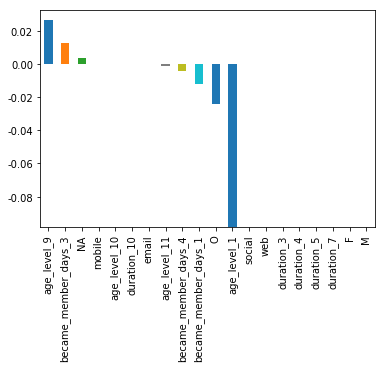

In [147]:
plot_res(res[2],title_list)

## discount预测

### 简单决策树分类

In [149]:
simple_decisionTree(train_X,train_y_discount,test_X,test_y_discount)

clf train score 准确率为 0.9418
clf test score 准确率为 0.9242


(0.94181,
 0.924193,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'))

max_depth 1:
clf train score 准确率为 0.7990
clf test score 准确率为 0.8077
max_depth 2:
clf train score 准确率为 0.8397
clf test score 准确率为 0.8496
max_depth 3:
clf train score 准确率为 0.9249
clf test score 准确率为 0.9297
max_depth 4:
clf train score 准确率为 0.9285
clf test score 准确率为 0.9283
max_depth 5:
clf train score 准确率为 0.9302
clf test score 准确率为 0.9317
max_depth 6:
clf train score 准确率为 0.9303
clf test score 准确率为 0.9312
max_depth 7:
clf train score 准确率为 0.9307
clf test score 准确率为 0.9314
max_depth 8:
clf train score 准确率为 0.9314
clf test score 准确率为 0.9304
max_depth 9:
clf train score 准确率为 0.9325
clf test score 准确率为 0.9303
max_depth 10:
clf train score 准确率为 0.9337
clf test score 准确率为 0.9283


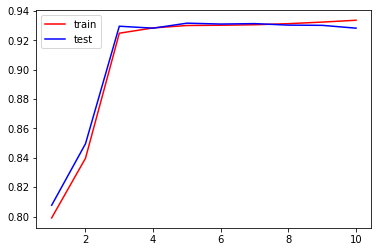

In [150]:
#探索在不同max_depth情况下模型拟合情况
tr=[]
te=[]
for i in range(10):
    print("max_depth {}:".format(i+1))
    res = simple_decisionTree(train_X,train_y_discount,test_X,test_y_discount,depth=i+1)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.legend()
plt.show()

In [155]:
#选择最佳max_depth
clf = simple_decisionTree(train_X,train_y_discount,test_X,test_y_discount,depth=7)[2]

clf train score 准确率为 0.9307
clf test score 准确率为 0.9314


### 网格搜索模型优化

In [156]:
grid_searchCV(train_X,train_y_discount)

Fitting 10 folds for each of 14400 candidates, totalling 144000 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 9688 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 12688 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 16088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 24088 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 28688 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 33688 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 39088 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 44888 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 51088 tasks      | el

{'criterion': 'entropy', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'splitter': 'best'} 0.9295946696279844


In [166]:
clf=DecisionTreeClassifier(random_state=11
                              ,max_depth=6
                              ,criterion='entropy'
                              ,min_impurity_decrease=0
                           ,min_samples_leaf=1
                           ,splitter='best'
                              )
clf=clf.fit(train_X,train_y_discount)
score_tr = round(clf.score(train_X, train_y_discount), 6)
print(u'clf train 准确率为 %.4lf' % score_tr)
y_pred = clf.predict(test_X)
score_te = metrics.accuracy_score(test_y_discount,y_pred)
print(u'clf test 准确率为 %.4lf' % score_te)

clf train 准确率为 0.9303
clf test 准确率为 0.9316


email                     0.000000
social                    0.107215
web                       0.154600
mobile                    0.000000
duration_3                0.000000
duration_4                0.000000
duration_5                0.000000
duration_7                0.375722
duration_10               0.362226
F                         0.000000
M                         0.000000
NA                        0.000000
O                         0.000000
age_level_1               0.000000
age_level_2               0.000000
age_level_3               0.000000
age_level_4               0.000000
age_level_5               0.000000
age_level_6               0.000000
age_level_7               0.000000
age_level_8               0.000000
age_level_9               0.000000
age_level_10              0.000238
age_level_11              0.000000
became_member_days_0      0.000000
became_member_days_1      0.000000
became_member_days_2      0.000000
became_member_days_3      0.000000
became_member_days_4

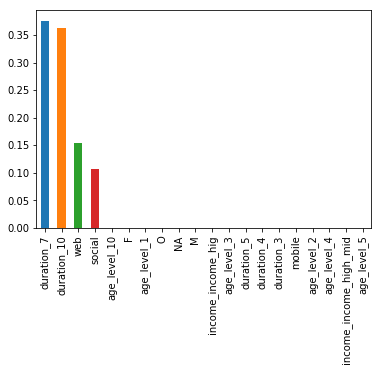

In [158]:
plot_res(clf,title_list)

### ada

n_estimators:50
ada train 准确率为 0.9418
ada test 准确率为 0.9212
n_estimators:100
ada train 准确率为 0.9418
ada test 准确率为 0.9208
n_estimators:150
ada train 准确率为 0.9418
ada test 准确率为 0.9233
n_estimators:200
ada train 准确率为 0.9418
ada test 准确率为 0.9236
n_estimators:250
ada train 准确率为 0.9418
ada test 准确率为 0.9236
n_estimators:300
ada train 准确率为 0.9418
ada test 准确率为 0.9232
n_estimators:350
ada train 准确率为 0.9418
ada test 准确率为 0.9235
n_estimators:400
ada train 准确率为 0.9418
ada test 准确率为 0.9242
n_estimators:450
ada train 准确率为 0.9418
ada test 准确率为 0.9240


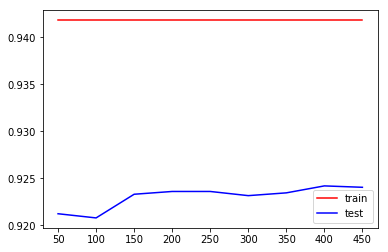

In [170]:
#探索在不同n_estimators情况下模型拟合情况
tr=[]
te=[]
range_list = range(2,20,1)
for i in range_list:
    print("n_estimators:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,i,0.1)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
plt.legend()
plt.show()

learning_rate:0.01
ada train 准确率为 0.9418
ada test 准确率为 0.92374900000000004229860905979876406490803
learning_rate:0.05
ada train 准确率为 0.9418
ada test 准确率为 0.92360100000000000530775423612794838845730
learning_rate:0.1
ada train 准确率为 0.9418
ada test 准确率为 0.92330500000000004234834705130197107791901
learning_rate:0.25
ada train 准确率为 0.9418
ada test 准确率为 0.92345299999999996831689941245713271200657
learning_rate:0.5
ada train 准确率为 0.9418
ada test 准确率为 0.92345299999999996831689941245713271200657
learning_rate:0.8
ada train 准确率为 0.9418
ada test 准确率为 0.92434099999999996821742342945071868598461
learning_rate:1
ada train 准确率为 0.9418
ada test 准确率为 0.92493300000000000515854026161832734942436
learning_rate:1.5
ada train 准确率为 0.9418
ada test 准确率为 0.92419300000000004224887106829555705189705
learning_rate:2
ada train 准确率为 0.9290
ada test 准确率为 0.91901100000000002232525275758234784007072


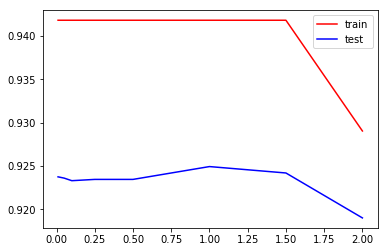

In [160]:
#探索在不同learning_rate情况下模型拟合情况
tr=[]
te=[]
range_list =[0.01,0.05,0.1,0.25,0.5,0.8,1,1.5,2]
for i in range_list :
    print("learning_rate:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,10,i)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
#plt.xticks(range(1,11))
plt.legend()
plt.show()

In [161]:
res=ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,4000,1.5)

ada train 准确率为 0.9418
ada test 准确率为 0.92212000000000005073275133327115327119827


email                     0.000000e+00
social                    5.826650e-03
web                       8.354174e-03
mobile                    0.000000e+00
duration_3                1.163449e-08
duration_4                2.559191e-07
duration_5                2.363515e-02
duration_7                1.498397e-02
duration_10               2.219436e-04
F                         7.144534e-02
M                         6.311269e-02
NA                        4.387306e-03
O                         4.804608e-02
age_level_1               1.556289e-02
age_level_2               2.790394e-02
age_level_3               4.268301e-02
age_level_4               2.843656e-02
age_level_5               2.531384e-02
age_level_6               5.432678e-02
age_level_7               1.844263e-02
age_level_8               2.308986e-02
age_level_9               1.069367e-02
age_level_10              1.283459e-05
age_level_11              5.417408e-04
became_member_days_0      4.420066e-02
became_member_days_1     

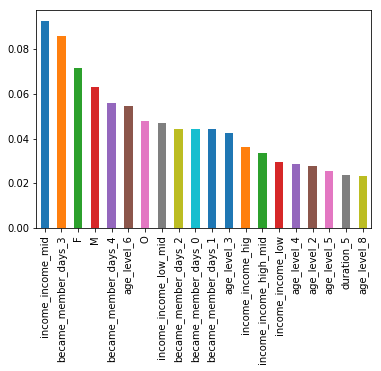

In [181]:
plot_res(res[2],title_list)

n_estimators:2
ada train 准确率为 0.9303
ada test 准确率为 0.9316
n_estimators:3
ada train 准确率为 0.9303
ada test 准确率为 0.9316
n_estimators:4
ada train 准确率为 0.9303
ada test 准确率为 0.9316
n_estimators:5
ada train 准确率为 0.9317
ada test 准确率为 0.9312
n_estimators:6
ada train 准确率为 0.9323
ada test 准确率为 0.9303
n_estimators:7
ada train 准确率为 0.9339
ada test 准确率为 0.9298
n_estimators:8
ada train 准确率为 0.9345
ada test 准确率为 0.9292
n_estimators:9
ada train 准确率为 0.9346
ada test 准确率为 0.9292
n_estimators:10
ada train 准确率为 0.9357
ada test 准确率为 0.9297
n_estimators:11
ada train 准确率为 0.9360
ada test 准确率为 0.9294
n_estimators:12
ada train 准确率为 0.9360
ada test 准确率为 0.9294
n_estimators:13
ada train 准确率为 0.9360
ada test 准确率为 0.9289
n_estimators:14
ada train 准确率为 0.9360
ada test 准确率为 0.9288
n_estimators:15
ada train 准确率为 0.9361
ada test 准确率为 0.9289
n_estimators:16
ada train 准确率为 0.9361
ada test 准确率为 0.9289
n_estimators:17
ada train 准确率为 0.9363
ada test 准确率为 0.9291
n_estimators:18
ada train 准确率为 0.9364
ada test 准确率为 0.9288
n_est

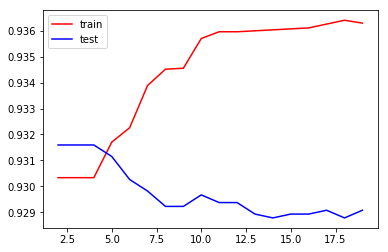

learning_rate:0.01
ada train 准确率为 0.9418
ada test 准确率为 0.9254
learning_rate:0.05
ada train 准确率为 0.9418
ada test 准确率为 0.9257
learning_rate:0.1
ada train 准确率为 0.9418
ada test 准确率为 0.9258
learning_rate:0.25
ada train 准确率为 0.9417
ada test 准确率为 0.9240
learning_rate:0.5
ada train 准确率为 0.9408
ada test 准确率为 0.9246
learning_rate:0.8


In [ ]:
#探索在不同n_estimators情况下模型拟合情况
tr=[]
te=[]
range_list = range(2,20,1)
for i in range_list:
    print("n_estimators:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,i,0.1)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
plt.legend()
plt.show()

#探索在不同learning_rate情况下模型拟合情况
tr=[]
te=[]
range_list =[0.01,0.05,0.1,0.25,0.5,0.8,1,1.5,2]
for i in range_list :
    print("learning_rate:{}".format(i))
    res = ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,4000,i)
    tr.append(res[0])
    te.append(res[1])
plt.figure()
plt.plot(range_list,tr,color='red',label='train')
plt.plot(range_list,te,color='blue',label='test')
#plt.xticks(range(1,11))
plt.legend()
plt.show()

In [183]:
res=ada_classfier(train_X,train_y_bogo,test_X,test_y_bogo,4000,1.5)
plot_res(res[2],title_list)

ada train 准确率为 0.9399
ada test 准确率为 0.9223


NameError: name 'ada' is not defined